In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import chi2_contingency

In [2]:
# read in files
df = pd.read_csv("./moz_train.csv",sep="|")
df_test = pd.read_csv("./moz_test.csv",sep="|")

In [3]:
df.describe(include='all') # overview of full data

,id,industry,geography,most_common_browser,session_time_prior_month_seconds,prior_month_paid
count,4.800000e+04,40636,48000,48000,48000.000000,48000.000000
unique,NaN,8,16,4,NaN,NaN
top,NaN,health care,USA,Chrome,NaN,NaN
freq,NaN,6052,8573,24194,NaN,NaN
mean,4.997442e+09,NaN,NaN,NaN,1952.151854,85.624461
std,2.896754e+09,NaN,NaN,NaN,2579.835645,32.754654
min,3.134830e+05,NaN,NaN,NaN,1.000000,0.040000
25%,2.481218e+09,NaN,NaN,NaN,612.000000,63.845328
50%,4.993512e+09,NaN,NaN,NaN,1210.000000,87.822595
75%,7.516707e+09,NaN,NaN,NaN,2289.000000,111.080471


In [4]:
df.dtypes

id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
dtype: object

In [5]:
df['industry'].value_counts()
df['geography'].value_counts()
df['most_common_browser'].value_counts()
df['prior_month_paid'].isnull().values.any()
df['session_time_prior_month_seconds'].isnull().values.any()

False

In [6]:

df['geography'].value_counts()

USA               8573
CA                5381
Canada            5328
US                4309
America           4305
United States     4270
UK                2114
Pakistan          1797
Greece            1782
India             1773
Spain             1748
France            1739
Esp               1735
GB                1118
United Kingdom    1029
England            999
Name: geography, dtype: int64

In [7]:
df.isna().sum()
df['industry'].fillna(value="None", inplace=True) # fill in fake values for null
df_test.isna().sum()
df_test['industry'].fillna(value="None", inplace=True) # fill in fake values for null

In [8]:
df.corr() # relatively weak correlation between the 2 continuous variables (if it were strong, we could perhaps do a simple linear regression)

,id,session_time_prior_month_seconds,prior_month_paid
id,1.000000,0.001831,-0.001129
session_time_prior_month_seconds,0.001831,1.000000,0.217124
prior_month_paid,-0.001129,0.217124,1.000000


In [9]:
chi2_contingency(pd.crosstab(df['industry'], df['geography'])) # p > 0.05 so independent (look at relationship b/w categorical)

(131.58733682257377,
 0.22128204498782403,
 120,
 array([[ 539.20125   ,  673.97025   ,  667.332     ,  125.12475   ,
          217.30875   ,  217.80975   ,  140.0295    ,  223.1955    ,
          222.06825   ,  225.07425   ,  218.937     ,  264.7785    ,
          539.70225   , 1073.76825   ,  128.88225   ,  534.8175    ],
        [ 660.45875   ,  825.53508333,  817.404     ,  153.26325   ,
          266.17791667,  266.79158333,  171.51983333,  273.3885    ,
          272.00775   ,  275.68975   ,  268.17233333,  324.32283333,
          661.07241667, 1315.24108333,  157.86575   ,  655.08916667],
        [ 542.78875   ,  678.45441667,  671.772     ,  125.95725   ,
          218.75458333,  219.25891667,  140.96116667,  224.6805    ,
          223.54575   ,  226.57175   ,  220.39366667,  266.54016667,
          543.29308333, 1080.91241667,  129.73975   ,  538.37583333],
        [ 530.1428125 ,  662.64772917,  656.121     ,  123.0226875 ,
          213.65802083,  214.15060417,  137.6770416

In [10]:
chi2_contingency(pd.crosstab(df['most_common_browser'], df['geography'])) # p > 0.05 so independent (look at relationship b/w categorical)

(29.617311614743304,
 0.9626576944608211,
 45,
 array([[2169.899375  , 2712.24820833, 2685.534     ,  503.537625  ,
          874.51229167,  876.52845833,  563.51858333,  898.20225   ,
          893.665875  ,  905.762875  ,  881.06483333, 1065.54408333,
         2171.91554167, 4321.14920833,  518.658875  , 2152.25791667],
        [ 710.4146875 ,  887.97710417,  879.231     ,  164.8558125 ,
          286.31114583,  286.97122917,  184.49329167,  294.067125  ,
          292.5819375 ,  296.5424375 ,  288.45641667,  348.85404167,
          711.07477083, 1414.72360417,  169.8064375 ,  704.63895833],
        [ 711.6703125 ,  889.5465625 ,  880.785     ,  165.1471875 ,
          286.8171875 ,  287.4784375 ,  184.819375  ,  294.586875  ,
          293.0990625 ,  297.0665625 ,  288.96625   ,  349.470625  ,
          712.3315625 , 1417.2240625 ,  170.1065625 ,  705.884375  ],
        [ 713.015625  ,  891.228125  ,  882.45      ,  165.459375  ,
          287.359375  ,  288.021875  ,  185.16875   ,

In [11]:
chi2_contingency(pd.crosstab(df['most_common_browser'], df['industry'])) # p > 0.05 so independent (look at relationship b/w categorical)

(28.361775599120328,
 0.24507692416632806,
 24,
 array([[3030.2985    , 3711.76283333, 3050.46016667, 2979.39029167,
         3050.46016667, 3039.87529167, 2963.26095833, 1192.56258333,
         1175.92920833],
        [ 992.10525   , 1215.21341667,  998.70608333,  975.43814583,
          998.70608333,  995.24064583,  970.15747917,  390.43929167,
          384.99360417],
        [ 993.85875   , 1217.36125   , 1000.47125   ,  977.1621875 ,
         1000.47125   ,  996.9996875 ,  971.8721875 ,  391.129375  ,
          385.6740625 ],
        [ 995.7375    , 1219.6625    , 1002.3625    ,  979.009375  ,
         1002.3625    ,  998.884375  ,  973.709375  ,  391.86875   ,
          386.403125  ]]))

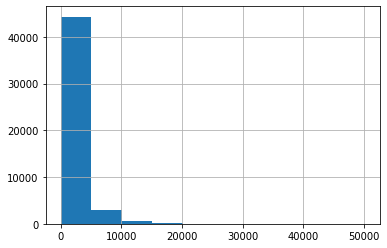

In [12]:
hist = df['session_time_prior_month_seconds'].hist(bins=10) # indicates there are outliers (option: we could trim these)

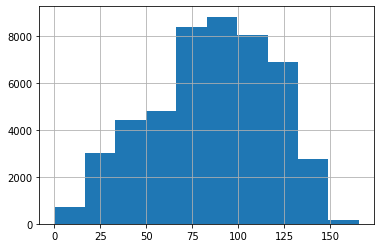

In [13]:
hist = df['prior_month_paid'].hist(bins=10) # no major outliers

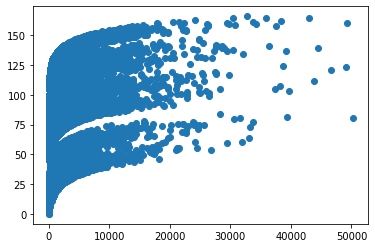

In [14]:
# look at visual relationship between session time and prior month paid
plt.scatter(df['session_time_prior_month_seconds'], df['prior_month_paid'])
plt.show() 

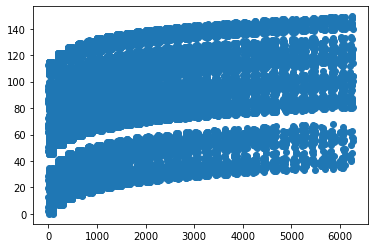

In [15]:
# trimming is an option if there are outliers (this was done purely for investigation purposes)
q = df["session_time_prior_month_seconds"].quantile(0.95)
df_trimmed = df[df["session_time_prior_month_seconds"] < q]
plt.scatter(df_trimmed['session_time_prior_month_seconds'], df_trimmed['prior_month_paid'])
plt.show() 

In [16]:
# assign data 
X = df['session_time_prior_month_seconds'].to_numpy().reshape(-1,1)
y = df['prior_month_paid'].to_numpy().reshape(-1,1)
X_test = df_test['session_time_prior_month_seconds'].to_numpy().reshape(-1,1)
y_test = df_test['prior_month_paid'].to_numpy().reshape(-1,1)